## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [60]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

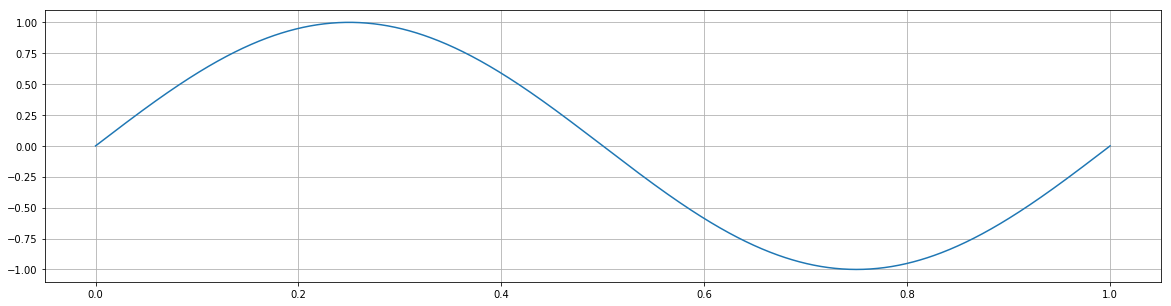

In [61]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F=1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


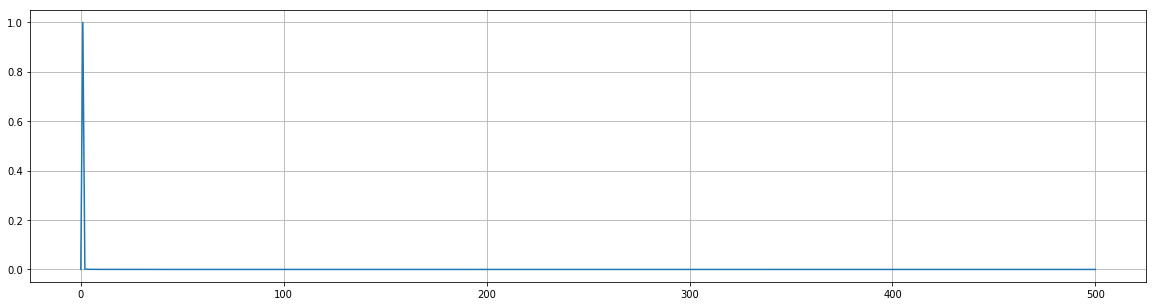

In [62]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


Syganał sinusoidalny składający się z 4 składowych


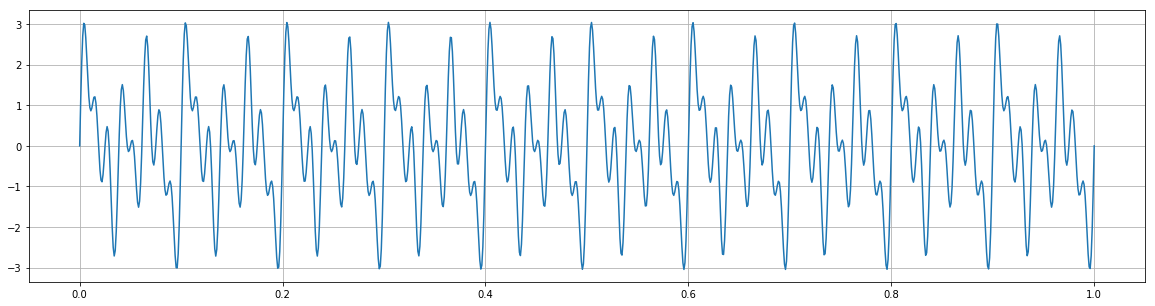

In [63]:
F = [30, 50, 20, 80]
t = np.linspace(0.0, 1.0, N)
ft = sum([np.sin(2*np.pi*t*f) for f in F])
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
print('Syganał sinusoidalny składający się z 4 składowych')
plt.show()

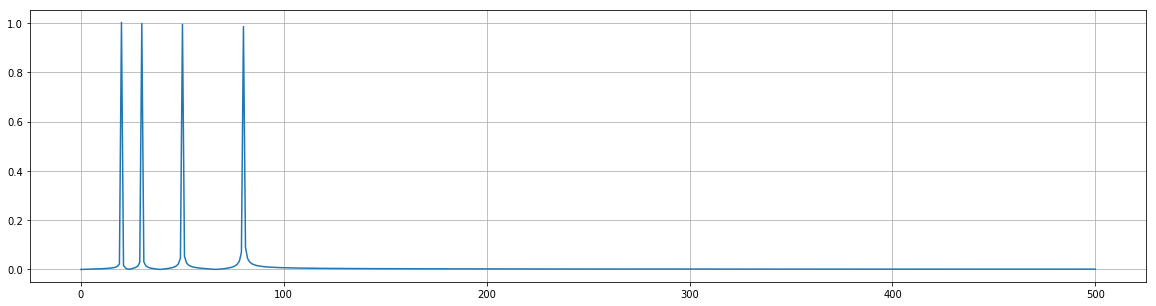

In [64]:
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand(). 

In [65]:
from random import random
t = np.linspace(0.0, 1.0, N)
F=10
ft = [np.sin(2*np.pi*i*F) + random() for i in t]

2. Proszę narysować wykres zaszumionej funkcji.

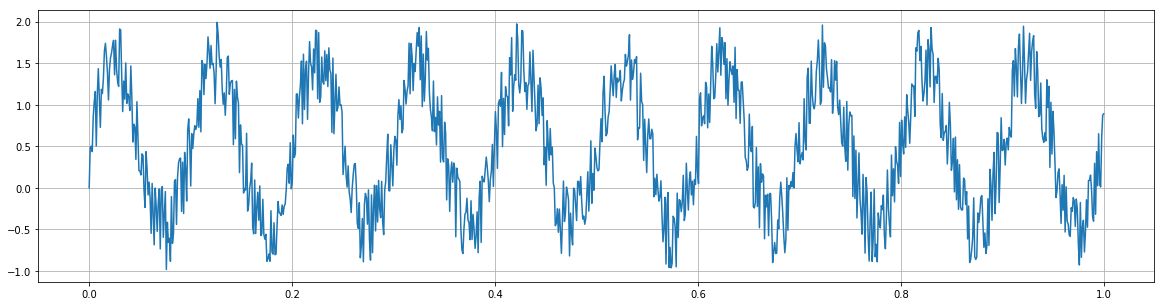

In [66]:
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału.

Wykres transformaty Fouriera z szumami


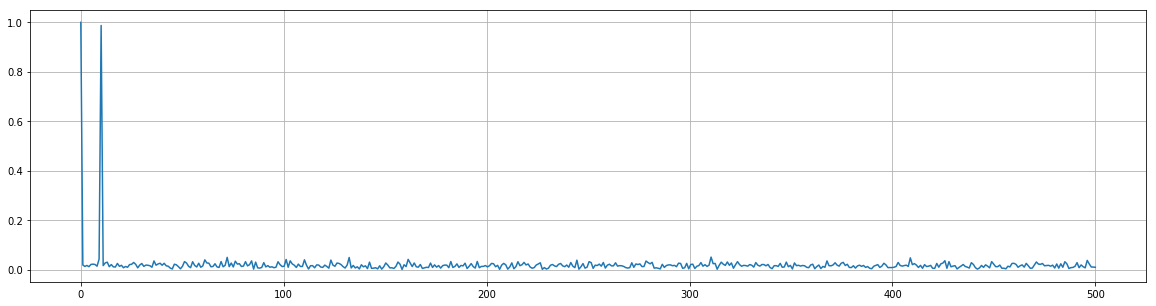

In [67]:
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yn = np.abs(yf[0:N//2])
plt.plot(xf, 2.0/N * yn)
plt.grid()
print('Wykres transformaty Fouriera z szumami')
plt.show()

Wykres transformaty Fouriera z usuniętymi szymami


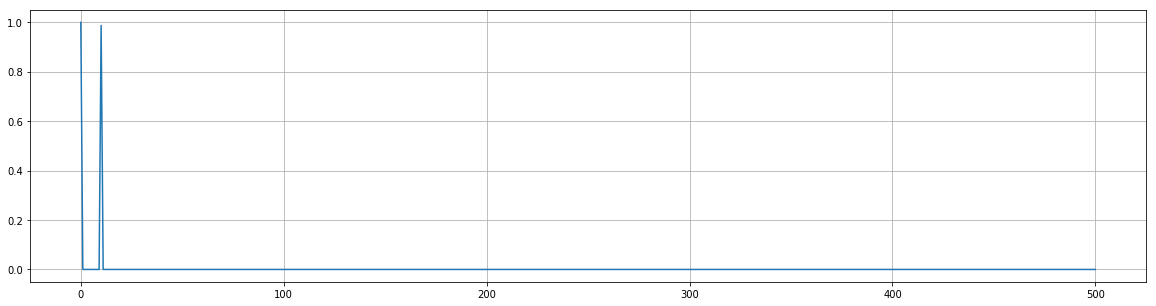

In [68]:
for i in range(len(yn)):
    if abs(yn[i]) < 50: 
        yn[i] = 0

plt.plot(xf, 2.0/N * yn)
plt.grid()
print('Wykres transformaty Fouriera z usuniętymi szymami')
plt.show()

4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału.

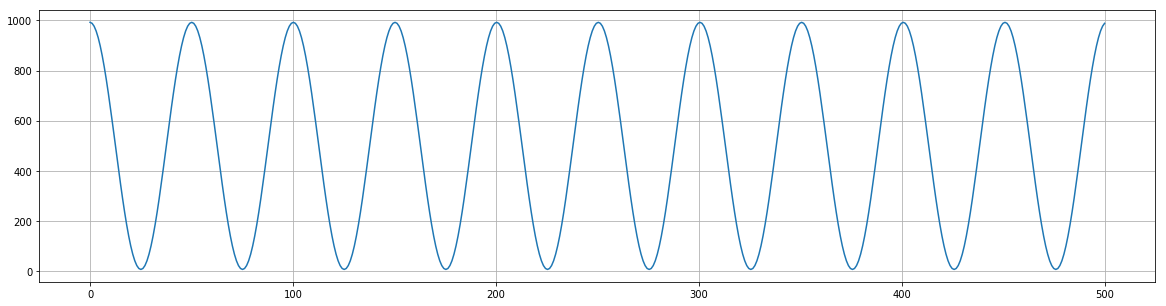

In [72]:
fft = fft(yn)
plt.plot(xf, np.real(fft))
plt.grid()
plt.show()

### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt.

Zadanie 3 zostało zrobione po za jupyterem, poniżej przedstawiam kod. Wszystkie wykresy i nagrania zostaną wysłane razem ze sprawozdaniem

Najpierw został wczytany plik z nagraniem, po czym został wygenerowany wykres tego nagrania.

In [ ]:
rate, data = wavfile.read('../res/sound.wav')
samples_num = len(data)
scaled_data = data / (2. ** 15)
time_arr = np.arange(0, float(samples_num), 1) / rate
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(time_arr, scaled_data, linewidth=0.3, alpha=0.7, color='#004bc6')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.savefig('../res/sound.png')
plt.show()

Następnie został wykonany analiz sygnału dźwiękowego za pomocą FFT.

In [ ]:
T = 1.0 / samples_num
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0 / (2.0 * T), samples_num // 2)
plt.plot(xf, (np.abs(yf[0:samples_num // 2])))
plt.grid()
plt.savefig('../res/sound_after_fft.png')
plt.show()

Zostały usunięte częstotliwości z sygnału dźwiękowego pomiędzy 15 kHz a 30 kHz.

In [ ]:
for i in range(len(xf)):
    if 15000 < xf[i] < 30000:
        yf[i] = 0
plt.plot(xf, (np.abs(yf[0:samples_num // 2])))
plt.grid()
plt.savefig('../res/sound_after_remove.png')
plt.show()

Na koniec do sygnału dźwiękowego została dokonana odwrotna transformata. Powstały dźwięk sygnał dźwiękowy został zapisany.

In [ ]:
y = np.real(fft.ifft(yf))
wavfile.write("../res/sound_after_fft.wav", len(y), y)

plt.plot(time_arr, y)
plt.grid()
plt.savefig('../res/sound_after.png')
plt.show()